# Cointegration and Error Correction Models

## Stationary vs Non-Stationary Data

Stationary I(0) data generation process:
$$y_t = \alpha + \phi y_{t-1} + \varepsilon _2$$ 
where:
$$\varepsilon _t \sim WN$$
$$|\phi| < 1$$

non-stationary I(0) is also called a Trend stationary process providing $\phi < 1$ as it is stationary around a deterministic trend:
$$y_t = \alpha + \beta _t + \phi y_{t-1} + \varepsilon _t$$
non-stationary I(1) / series integrated of order 1:
$$ y_t = \alpha + y_{t-1} + \varepsilon _t$$
**Stationary means the covariance is independent of time**

I(1) process is also called a **difference** stationary process as it is stationary after differencing once.

When the data is I(1) we say the data contains a **stochastic** trend.

When the data is I(0) and shows trend we say the data contains a **deterministic** trend.

I(0) = Deterministic. I(1) = Stochastic

Where the order of integration is how many times you must difference the process to make it stationary.

A lot of economic and financial data are integrated or contain stochastic trends

Consider the random wlaks: $$y_t = y_{t-1} + u_t$$
$$z_t = z_{t-1} + u_t$$

if we run the regression: $$y_t = \alpha + \beta z_t + \varepsilon _t$$

since they are both random walks we would expect the OLS estimate of parameter Beta to tend to zero ($\beta$ -> 0) as observations become large(T -> $ \infin $)

The same is expected of $R^2$.

When this does not happen and the regression discovers a relationship between yt and zt despite the fact there is none, it is called a **spurious regression**.

Why does this occur?

Because by construction if: $$y_t \sim I(1)$$
$$z_t \sim I(1)$$

then by construction $\varepsilon$, the residuals, must be I(1).

This is from Newbold Grainger's research.

Error terms are non-stationary, however want error terms to be well behaved i.e have Gauss Markov properties. If error terms are I(1) this means the regression is meaningless, this needs to be accounted for. 

One way of resolving this is to difference the series successively until stationarity is achieve and then use the sationary series for regression analysis.

Original Random Walk ADF P-value: 0.4954478631379728
Differenced ADF P-value: 0.0


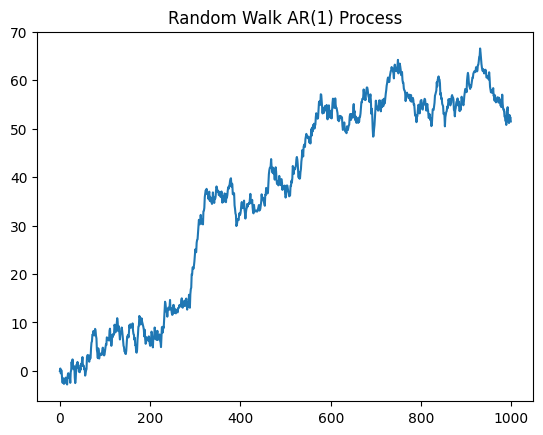

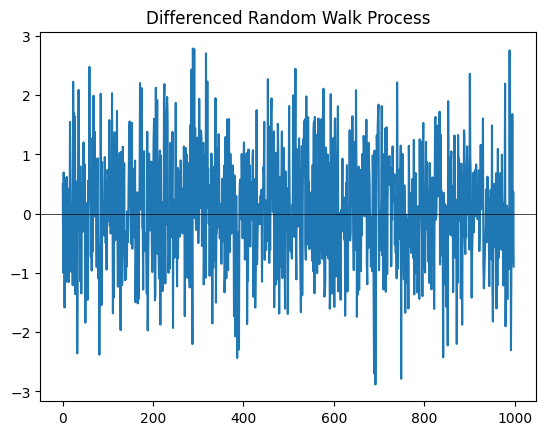

In [79]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

np.random.seed(4)
n = 1000

epsilon = np.random.normal(0,1,n)

y_rw = np.zeros(n) # random walk
phi_1 = 1

for t in range(1,n):
    y_rw[t] = phi_1*y_rw[t-1] + epsilon[t]

adf_test = adfuller(y_rw, autolag= 'BIC')

print(f'Original Random Walk ADF P-value: {adf_test[1]}')

plt.figure()
pd.Series(y_rw).plot(title = f'Random Walk AR(1) Process')

# Now differencing

delta_y = np.diff(y_rw)

adf_test_diff = adfuller(delta_y, autolag= 'BIC')

print(f'Differenced ADF P-value: {adf_test_diff[1]}')

plt.figure()
pd.Series(delta_y).plot(title='Differenced Random Walk Process')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


The series is non-stationary, and its behavior is governed by a random walk process. The p-value from the ADF test confirms this, as it is high, suggesting that the series has a unit root.
The plot shows a wandering path with increasing variance.

After differencing , the series becomes stationary, as evidenced by a low p-value in the ADF test. The plot of the differenced data shows random fluctuations around zero. Showing mean reversion and lack of trend.

Let's see this for a AR series with a stochastic trend.

Original Random Walk ADF P-value: 0.5428339321823163
Differenced ADF P-value: 0.0


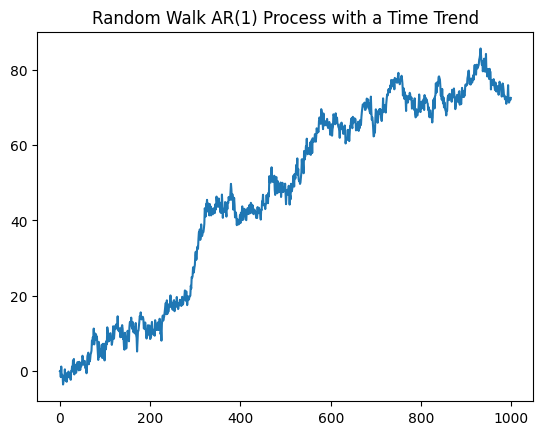

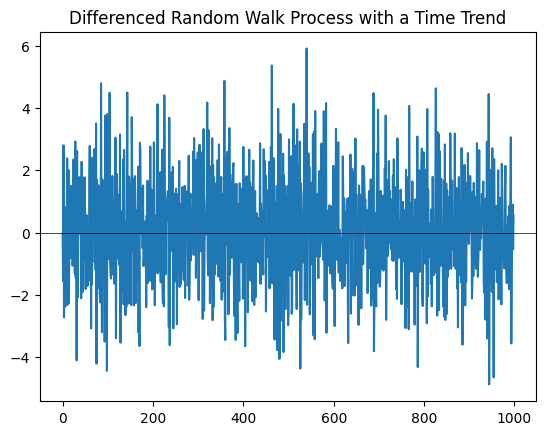

In [80]:
np.random.seed(2)
n = 1000

epsilon = np.random.normal(0,1,n)

y_rw_t = np.zeros(n) # random walk
phi_1 = 1
beta = 0.02 # time trend 

for t in range(1,n):
    y_rw_t[t] =  (beta * t) + phi_1 * y_rw[t-1] + epsilon[t]

adf_test = adfuller(y_rw_t, autolag= 'BIC')

print(f'Original Random Walk ADF P-value: {adf_test[1]}')

plt.figure()
pd.Series(y_rw_t).plot(title = f'Random Walk AR(1) Process with a Time Trend')

# Differenced

delta_y = np.diff(y_rw_t)
adf_test_diff = adfuller(delta_y, autolag= 'BIC')

print(f'Differenced ADF P-value: {adf_test_diff[1]}')

plt.figure()
pd.Series(delta_y).plot(title='Differenced Random Walk Process with a Time Trend')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()




The original series shows a clear upward trend due to the time trend component and it also has random fluctuations around this trend. The ADF test result indicates non-stationarity.
The differenced series represents the changes in the values from one time period to the next, after differencing the series oscillates around zero with no upward or downward drift , it is a stationary process as confirmed by the p-value.
Note that differencing removes the determinstic trend.

## Problems with Differenced Data

If we difference both variables then implicitly we are also differencing the error process in the regression. This may produce a non-invertible(MA can't be expressed as a AR(infinity)process) moving average error process, which presents serious estimation problems.

If we difference the variables the models can no longer give a unique long-run solution/ clear long-run relationship, cointegration.

## Cointegration (Engle-Granger, 1987)

Integrated variables that move together.

In many cases if two or more variables that are I(1) are linearly combined the combination will also be I(1)

However if two or more I(1) variables are combined and the combination turns out to be I(0), then the variables are said to be Cointegrated.

Cointegration - integrated variables that move together.

Many Economic/Financial time series are non-stationary integrated processes. I(1) such as 'pure random walk' or a 'random walk with drift'

**Key** - If two or more such integrated time series data, move together over time, there must exist, some influences on the data series, that bind the individual data series together over time. This implies the series are bound together by some Long-run Equillibrium relationship. 

A cointegrating relationship may also be seen as a long term equillibrium relationship.

Cointegrated variables may deviate from their long run relationship in the short run, but this property of cointegration implies the deviation will be short lived and variables would return to their equillibrium relationship in the long run.

Importance of Cointegration:

A lot of economic and financial data are believed to contain stochastic trends or are I(1).

Inclusion of I(1) data in a regression equation and use of OLS estimation may lead to a spurious regression.

## Definition of Cointegration

Time series $x_t$ and $y_t$ are said to be cointegrated of order d,b where d,b > 0, written as $$ y_t,x_t \sim CI(d,b)$$

- both series are integrated of order **d**
- there exists a linear combination of these variables say $\beta _1 x_t + \beta _2 y_t$ which is integrated of order **d-b**

The column vector: $$(\beta _1 ,  \beta _2)$$ is called the cointegrating vector.

What does cointegration imply?

Cointegration implies a long run economic relationship between the variables considered.

If for example, two variables x_t and y_t are found to be cointegrated , we would expect these two variables to move together with time.

In theory this should only happen when there is really a relationship linking the two variables together.

Cointegration occurs in a situation in which a linear combination between integrated variables has one unit root less than the integrated order of the variables in the model. The variables are cointegrated if and only if they have common **stochastic** trends that cancel each other out.

Generally:

$$\lambda _1 y_t + \lambda _2 z_t \sim I(0)$$
$$(y_t,z_t) \sim CI(d,b)$$
$$ Cointegrating \ vector [\lambda _1,\ \lambda _2]$$

**Multiple Variables**
$$\lambda _1 y_t + \lambda _2 z_t + \lambda _3 x_t \sim I(0)$$
$$(y_t,z_t, x_t) \sim CI(1,1)$$
$$ Cointegrating \ vector [\lambda _1,\ \lambda _2, \ \lambda _3]$$

The cointegrating vector is the weights that makes the linear expression follow a I(0) process.

In the multiple variable case: 'Two or more series co-move, the series individually are non-stationary I(1). The linear combination $\lambda _1,\ \lambda _2, \ \lambda _3$ eliminates the stochastic trend, meaning everytime there is an error the deviation gets corrected. Therefore deviations are transitory rather than permanent.

Let's illustrate a cointegrated pair of variables.

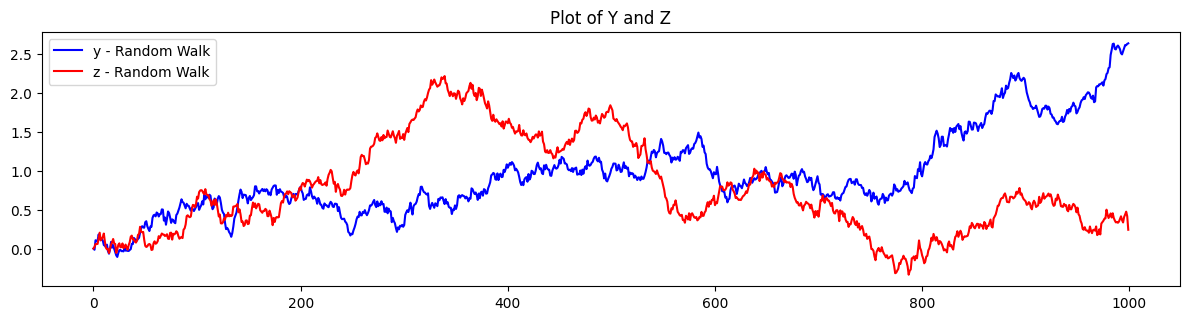

In [81]:
np.random.seed(5)

n = 1000
epsilon_1 = np.random.normal(0,0.05,n)
epsilon_2 = np.random.normal(0,0.05,n) # variables paths are determined by seperate white noise processes

y = np.zeros(n)
z = np.zeros(n)
# lets make both series AR(1) process with different intercepts. Notation for AR intercept is alpha

alpha_y = 0.001
phi_1y = 1
phi_1z = 1
alpha_z = 0.001

for t in range(1,n):
    y[t] = alpha_y + (phi_1y*y[t-1]) + epsilon_1[t]

for t in range(1,n):
    z[t] = alpha_z + (phi_1z*z[t-1]) + epsilon_2[t]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y, label='y - Random Walk', color='blue')
plt.plot(z, label ='z - Random Walk', color='red')
plt.title('Plot of Y and Z')
plt.legend()
plt.tight_layout()
plt.show()



## Testing for Cointegration

**Engle Granger (1987) Method**

Before the method we test the variables for their order of integration, using the **Augmented Dickey Fuller** test for presence of unit roots. We do this in order to check the variables are all I(1). If all the variables are I(0) then no need to consider cointegration, standard time series analysis can be done.

If variables are integrated of different orders, then it is possible to conclude they are not cointegrated.

**Method**

1) Set out regression, example two I(1) variables x and y: $$ y_t = \alpha + \beta x_t + \varepsilon _t$$
2) Save the residuals $\hat\varepsilon _t$ and run an augmented Dickey Fuller test on the residuals.
$$ \Delta \hat\varepsilon _t = \gamma \hat\varepsilon _t + \sum^{p}_{i=1} \Psi_i \Delta \hat{\epsilon}_{t-i} + \omega _t$$

notes:
- if constant is present in regression, exclude this from ADF test on residuals
- lag length set according to AIC/SBIC so epsilon residuals W are not correlated
- if epsilon is not white noise we need to add lag dependant variables.


**Hypothesis of interest**

$$H_0: \gamma = 0$$
$$H_1: \gamma < 0$$

Null: No Cointegration

Alternative: Cointegration

The estimated statistic and test values need to be compared to the MacKinnon values, as the test is on residuals so can't use Dickey Fuller values.


## Error Correction Model

Grainger Representation Theorem 
'If there is Cointegration there is a error correction term, when series overlap / intercept there is no error.'

For regression $$y_t = \alpha + \beta z_t + \varepsilon _t$$

The error correction model can be written as:
$$ \Delta y_t = -\lambda [\varepsilon_{t-1}] + \phi \Delta z_t + \omega _t$$

$$ \varepsilon _{t-1} = y_{t-1} - \alpha - \beta z_{t-1}$$

where the first term in the right hand side of the error correction equation, is the long term effect and the second is the short term effect of an error to the Equillibrium relationship.

1) $\lambda$ measures the speed of adjustment to error, by construction this should be negative.
2) $\phi$ measures the short term impact


## Diagnostics of the Engle Granger Method
Test for serial correlation between lagged variables. We assum independent random errors therefore presence leads to spurious results. We test this using the Breusch Godfrey test where the null is no serial correlation.

## Drawbacks of the Engle Granger Method
Specification of the functional form of the regression matters, i.e does x depend on y rather than y on x. is y = f(X) or x = g(y)

Two step procedure means that errors from the first step get carried into the second step.

This is complicated when dealing with a large number of variables.

Let's run a Engle Granger Cointegration test on the previous example.

In [82]:
## Before we run test we must check for Non sstationarity of variables
from statsmodels.tsa.stattools import adfuller

adf_results = {
    'y' : adfuller(y, autolag = 'BIC'),
    'z' : adfuller(z, autolag = 'BIC')
}

for series, result in adf_results.items():
    print(f"Results for {series}:")
    print(f"    ADF Statistic : {result[0]}")
    print(f"    p-value : {result[1]}")
    print(f"    Number of lags used: {result[2]}")
    print(f"    Critical Values:")
    for key , value in result[4].items():
        print(f"    {key}: {value}")
    print("=" * 55)

Results for y:
    ADF Statistic : -0.28306027750256
    p-value : 0.9278694746513511
    Number of lags used: 0
    Critical Values:
    1%: -3.4369127451400474
    5%: -2.864437475834273
    10%: -2.568312754566378
Results for z:
    ADF Statistic : -1.4740266282337287
    p-value : 0.5463186463318357
    Number of lags used: 0
    Critical Values:
    1%: -3.4369127451400474
    5%: -2.864437475834273
    10%: -2.568312754566378


The null hypothesis for an ADF test is that the sereies is non-stationary, for both series the p-value indicates there is insufficient evidence to reject the null hypothesis and the series are of order I(1). 

For clarity lets test to see if they are I(2):

In [83]:
diff_y = np.diff(y)
diff_z = np.diff(z)

adf_diff_results = {
    'diff_y' : adfuller(diff_y, autolag = 'BIC'),
    'diff_z' : adfuller(diff_z, autolag = 'BIC')
}

for series , result in adf_diff_results.items():
    print(f" Results for {series}:")
    print(f"    ADF Statistic : {result[0]}")
    print(f"    p-value : {result[1]}")
    print(f"    Number of lags used: {result[2]}")
    print(f"    Critical Values:")
    for key , value in result[4].items():
        print(f"    {key}: {value}")
    print("=" * 55)

 Results for diff_y:
    ADF Statistic : -32.03632254313276
    p-value : 0.0
    Number of lags used: 0
    Critical Values:
    1%: -3.4369193380671
    5%: -2.864440383452517
    10%: -2.56831430323573
 Results for diff_z:
    ADF Statistic : -32.670468428555516
    p-value : 0.0
    Number of lags used: 0
    Critical Values:
    1%: -3.4369193380671
    5%: -2.864440383452517
    10%: -2.56831430323573


The p-value for an ADF test on the differenced series tells us we can reject the null hypothesis of non-stationarity, meaning the Series are both I(1) and we can test for Cointegration.

In [84]:
#1) Set out regression

import statsmodels.api as sm

z = sm.add_constant(z) # Add constant to z for regression as z RHS
model = sm.OLS(y,z).fit() #run a regression on two variables
print(model.summary())
residuals = model.resid # Save the residuals

adf_test = adfuller(residuals , autolag = 'BIC')

print("Engle-Granger Cointegration Test Results")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"    {key}: {value}")


#

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.41
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           0.000447
Time:                        12:36:01   Log-Likelihood:                -804.28
No. Observations:                1000   AIC:                             1613.
Df Residuals:                     998   BIC:                             1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0249      0.028     36.934      0.0

Based on our regression results we see a R-Squared value of 0.011 indicating only 1% of variance in Y is accounted for by Z, there is a weak linear relationship as expected between two random walks.

From our Engle Granger Methodology, and our ADF test on the regression residuals, we obtain a p-value of 0.89 indicating that there is insufficient evidence to reject the null hypothesis that the residual of the linear regression between the variables is non-stationary. Indicating the series are not cointegrated, as we would expect due to the two processes paths being determined by seperate noise processes.

Let's test for a cointegrated pair that share a common stochastic trend.

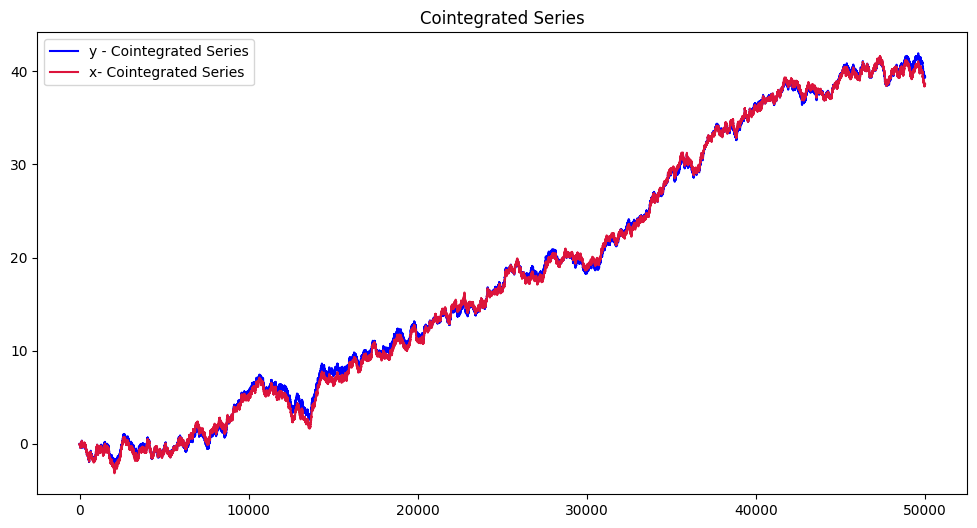

In [85]:
np.random.seed(7)

n = 50000
alpha_1 = 0.001
alpha_2 = 0.001
phi_1 = 1 # random walk
epsilon = np.random.normal(0,0.05,n) # common stochastic noise
eta = np.random.normal(0, 0.01, n) # idiosyncratic, unique noise specific to x


y = np.zeros(n)
x = np.zeros(n)

for t in range(1,n):
    y[t] = alpha_1 + phi_1* y[t-1] + epsilon[t]
    x[t] = alpha_2 + phi_1* x[t-1] + epsilon[t] + eta[t]

plt.figure(figsize=(12, 6))
plt.plot(y, label="y - Cointegrated Series", color='blue')
plt.plot(x, label="x- Cointegrated Series", color='crimson')
plt.legend()
plt.title("Cointegrated Series")
plt.show()


Visually the Series seem to comove.

Lets test the order of integration of each series.

In [86]:
adf_results = {
    'y' : adfuller(y , autolag = 'BIC'),
    'x' : adfuller(x, autolag = 'BIC')
}

for series , result in adf_results.items():
    print(f" Results for {series}:")
    print(f"    ADF Statistic : {result[0]}")
    print(f"    p-value : {result[1]}")
    print(f"    Number of lags used: {result[2]}")
    print(f"    Critical Values:")
    for key , value in result[4].items():
        print(f"    {key}: {value}")
    print("=" * 55)
    

 Results for y:
    ADF Statistic : -0.06411129479466224
    p-value : 0.9528979245996329
    Number of lags used: 0
    Critical Values:
    1%: -3.4304807953310763
    5%: -2.8615978088501315
    10%: -2.566800769739017
 Results for x:
    ADF Statistic : -0.14159595352918358
    p-value : 0.945134554127856
    Number of lags used: 0
    Critical Values:
    1%: -3.4304807953310763
    5%: -2.8615978088501315
    10%: -2.566800769739017


Both Series are non-stationary, as the null of the ADF test is the presence of a unit root , i.e rho = 0

In [87]:
adf_results = {
    'y_diff' : adfuller(np.diff(y) , autolag = 'BIC'),
    'x_diff' : adfuller(np.diff(x), autolag = 'BIC')
}

for series , result in adf_results.items():
    print(f" Results for {series}:")
    print(f"    ADF Statistic : {result[0]}")
    print(f"    p-value : {result[1]}")
    print(f"    Number of lags used: {result[2]}")
    print(f"    Critical Values:")
    for key , value in result[4].items():
        print(f"    {key}: {value}")
    print("=" * 55)

 Results for y_diff:
    ADF Statistic : -224.580048288828
    p-value : 0.0
    Number of lags used: 0
    Critical Values:
    1%: -3.430480797947222
    5%: -2.8615978100063884
    10%: -2.566800770354459
 Results for x_diff:
    ADF Statistic : -225.05410424408893
    p-value : 0.0
    Number of lags used: 0
    Critical Values:
    1%: -3.430480797947222
    5%: -2.8615978100063884
    10%: -2.566800770354459


We have confirmed the Series are of the same order of Integration

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.977e+07
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:36:29   Log-Likelihood:                -22278.
No. Observations:               50000   AIC:                         4.456e+04
Df Residuals:                   49998   BIC:                         4.458e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2736      0.003     99.576      0.0

<Axes: >

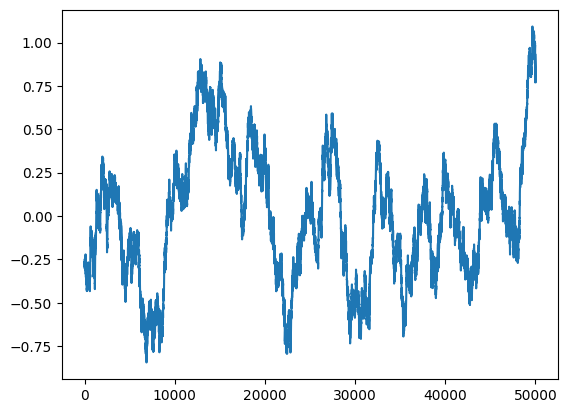

In [88]:
# Engle Granger Methodology

#Regress Variables
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

# Save residuals
residuals = model.resid

#ADF test on residuals of regression

engle_granger_result = adfuller(residuals)
print("Engle-Granger Cointegration Test Results")
print(f"ADF Statistic: {engle_granger_result[0]}")
print(f"p-value: {engle_granger_result[1]}")
print("Critical Values:")
for key, value in engle_granger_result[4].items():
    print(f"    {key}: {value}")

pd.Series(residuals).plot()

The OLS regression results return a R-squared value of 0.99 suggesting that the model explains most the variation in Y. Both coefficients of the regression are significant as null of t-test for significance is beta = 0.

The ADF test statistic returns a p-value of 0.09. This indicates at the 1 and 5 percent significance level we reject the null hypothesis that the series are cointegrated, at the 10% significance level we reject the null that the regressions residuals are stationary and the series are cointegrated.

n.b difficulty in constructing a cointegrated pair.